In [ ]:
import os
import shutil

root_train_dir = "D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\data\\train"
root_test_dir = "D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\data\\test"
root_validation_dir = "D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\data\\valid"
root_visualizaion_dir = "D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\data\\visualization"
saved_model_file_name = "currency_detector_mobilenet.h5"
tensorboard_dir = "D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\tensorboard"

In [ ]:
pip install keras


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import tensorflow as tf
from keras import applications
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 224,224
train_data_dir = root_train_dir
validation_data_dir = root_validation_dir
nb_train_samples = 1672
nb_validation_samples = 560
train_steps = 100 # 1672 training samples/batch size of 32 = 52 steps. We are doing heavy data processing so put 500 here
validation_steps = 20 # 560 validation samples/batch size of 32 = 10 steps. We put 20 for validation steps
batch_size = 32
epochs = 100

def build_model():
    # constructing the model
    model = tf.keras.applications.MobileNet(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3),
                                  pooling='avg')

    # only train the last 2 layers
    for layer in model.layers[:-10]:
        layer.trainable = False

    # Adding custom Layers
    x = model.output
    # x = Flatten()(x)
    predictions = Dense(6, activation="softmax")(x)

    # creating the final model
    model_final = Model(inputs=model.input, outputs=predictions)
    
    return model_final

model_final = build_model()
# compile the model
model_final.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Adam(lr=0.001), metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    fill_mode="nearest",
    zoom_range=0.3,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    rotation_range=180)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    fill_mode="nearest",
    zoom_range=0.3,
    rotation_range=30)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    # save_to_dir = root_visualizaion_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    class_mode="categorical")

# Save the model according to the conditions
checkpoint = ModelCheckpoint("currency_detector_test.h5", monitor='val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False,
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

# Train the model
model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps = validation_steps,
    workers=16,
    callbacks=[checkpoint, early])

C:\Users\NajeebAhmed\anaconda3\envs\currency\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 254 images belonging to 6 classes.
Found 68 images belonging to 6 classes.


C:\Users\NajeebAhmed\anaconda3\envs\currency\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 181s 2s/step - loss: 0.1065 - accuracy: 0.9603 - val_loss: 1.5356 - val_accuracy: 0.4513

Epoch 00001: val_loss improved from inf to 1.53561, saving model to currency_detector_test.h5
Epoch 2/100
100/100 [==============================] - 215s 2s/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 4.8970 - val_accuracy: 0.1271

Epoch 00002: val_loss did not improve from 1.53561
Epoch 3/100
100/100 [==============================] - 223s 2s/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 4.2429 - val_accuracy: 0.1398

Epoch 00003: val_loss did not improve from 1.53561
Epoch 4/100
100/100 [==============================] - 218s 2s/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 4.1399 - val_accuracy: 0.2309

Epoch 00004: val_loss did not improve from 1.53561
Epoch 5/100
100/100 [==============================] - 231s 2s/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 3.5698 - val_accuracy: 0.3708

Epoch 00005: val_loss did no

In [ ]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
loaded_model = tf.keras.models.load_model('currency_detector_test.h5')

In [ ]:
loaded_model.layers[0].input_shape

[(None, 224, 224, 3)]

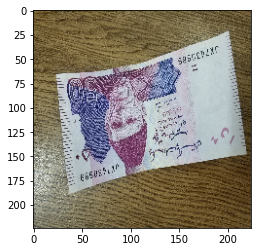

[[2.0486850e-04 2.0139197e-09 5.2778220e-01 4.8083693e-06 4.7185796e-01
  1.5024994e-04]]


In [ ]:
from keras.preprocessing import image

image_path="D:\\Internship\\New folder\\SeeingAI-Currency-Detection-master\\SeeingAI-Currency-Detection-master\\data\\test\\fifty\\IMG_20181023_161520.jpg"
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
#plt.title(get_label_name(result[0][0]))
plt.show()
print(result)

In [ ]:

from keras import applications
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224,224
image_scale = 1./255 # or 1./255 if you want to rescale (which should be the case)

nb_train_samples = 1672
nb_validation_samples = 560
train_steps = 100 # 1672 training samples/batch size of 32 = 52 steps. We are doing heavy data processing so put 500 here
validation_steps = 20 # 560 validation samples/batch size of 32 = 10 steps. We put 20 for validation steps
batch_size = 32
epochs = 100

def build_model():
    # constructing the model
    model = applications.mobilenet.MobileNet(weights="imagenet", include_top=False, 
                                             input_shape=(img_width, img_height, 3), pooling='avg')
    # only train the last 2 layers
    for layer in model.layers[:-10]:
        layer.trainable = False
    # Adding custom Layers
    x = model.output
    predictions = Dense(6, activation="softmax")(x)
    # creating the final model
    model_final = Model(inputs=model.input, outputs=predictions)
    
    return model_final

model_final = build_model()
# compile the model
model_final.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Adam(lr=0.001), metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
    rescale=image_scale,
    fill_mode="nearest",
    zoom_range=0.3,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    rotation_range=360)

validation_datagen = ImageDataGenerator(
    rescale=image_scale,
    fill_mode="nearest",
    zoom_range=0.3,
    rotation_range=30)

test_datagen = ImageDataGenerator(
    rescale=image_scale,
    fill_mode="nearest",
    zoom_range=0.3,
    rotation_range=30)

train_generator = train_datagen.flow_from_directory(
    root_train_dir,
    # save_to_dir = root_visualizaion_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
    root_validation_dir,
    target_size=(img_height, img_width),
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    root_test_dir,
    target_size=(img_height, img_width),
    class_mode="categorical")

# Class index
print("training labels are:", validation_generator.class_indices)

# Save the model according to the conditions
checkpoint = ModelCheckpoint(saved_model_file_name, monitor='val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False,
                             mode='auto', period=1)
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

tensorboard = TensorBoard(log_dir = tensorboard_dir)
# Train the model
history = model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps = validation_steps,
    workers=16,
    callbacks=[checkpoint, earlystopping, tensorboard])



Found 254 images belonging to 6 classes.
Found 35 images belonging to 6 classes.
Found 35 images belonging to 6 classes.
training labels are: {'fifty': 0, 'five_hundred': 1, 'hundred': 2, 'ten': 3, 'thousand': 4, 'twenty': 5}
Epoch 1/100
100/100 [==============================] - 235s 2s/step - loss: 0.1095 - accuracy: 0.9631 - val_loss: 2.1540 - val_accuracy: 0.7114

Epoch 00001: val_loss improved from inf to 2.15405, saving model to currency_detector_mobilenet.h5
Epoch 2/100
100/100 [==============================] - 265s 3s/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 5.2050 - val_accuracy: 0.2857

Epoch 00002: val_loss did not improve from 2.15405
Epoch 3/100
100/100 [==============================] - 261s 2s/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 4.2397 - val_accuracy: 0.5857

Epoch 00003: val_loss did not improve from 2.15405
Epoch 4/100
100/100 [==============================] - 349s 3s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7921 - val_accuracy: 0

# Test the model and generate confusion matrix

In [ ]:
probabilities = model_final.predict_generator(test_generator, workers = 16, verbose = 1)




2/2 [==============================] - 4s 111ms/step


In [ ]:
import numpy as np
print(test_generator.class_indices)
y_true = ((test_generator.classes))
print(y_true)
y_pred = (np.argmax(probabilities, axis = 1))
print(y_pred)

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_true, y_pred)

{'fifty': 0, 'five_hundred': 1, 'hundred': 2, 'ten': 3, 'thousand': 4, 'twenty': 5}
[0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 5 5]
[1 5 2 3 3 1 2 0 2 0 1 1 1 5 5 5 1 5 1 0 1 5 0 2 5 1 2 0 2 3 1 3 1 2 3]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true,y_pred)
print("Testing accuracy is",accuracy*100,"%")

Testing accuracy is 5.714285714285714 %


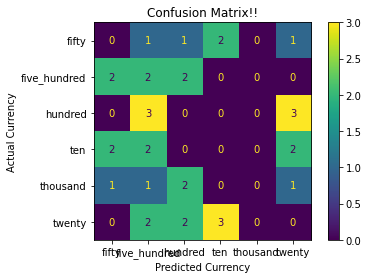

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cmd_obj = ConfusionMatrixDisplay(cf_matrix, display_labels=['fifty', 'five_hundred', 'hundred','ten','thousand','twenty'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Confusion Matrix!!', 
                xlabel='Predicted Currency', 
                ylabel='Actual Currency')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [ ]:
conda install matplotlib


ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

Confusion matrix, without normalization
<function confusion_matrix at 0x00000251928C9288>


TypeError: Image data of dtype object cannot be converted to float

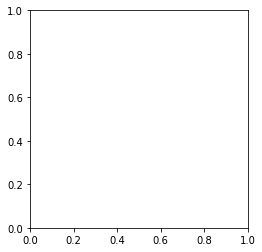

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
np.set_printoptions(precision=2)

name = ['fifty', 'five_hundred', 'hundred', 'ten', 'thousand', 'twenty']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=name,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(confusion_matrix, classes=name, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# dir(test_generator)
y_true = validation_generator.classes 


y_true = np.array([0] * 1000 + [1] * 1000)
y_pred = probabilities > 0.5



# Convert models to ONNX for further use

In [ ]:
import onnxmltools
import coremltools

# install from https://github.com/onnx/onnxmltools and https://github.com/apple/coremltools

model_coreml = coremltools.converters.keras.convert(saved_model_file_name, image_scale = image_scale)
model_onnx = onnxmltools.convert.convert_coreml(model_coreml, "currency_detector")

# Save as protobuf
onnxmltools.utils.save_model(model_onnx, saved_model_file_name + ".onnx")

# Utils to Move data around

In [ ]:
# utility to move data around
def move_files_subfolders(root_src_dir, root_target_dir, operation, image_number):
    for src_dir, dirs, files in os.walk(root_src_dir):
        num_temp = 0
        dst_dir = src_dir.replace(root_src_dir, root_target_dir)
        if not os.path.exists(dst_dir):
            os.mkdir(dst_dir)
        for individual_file in files:
            if num_temp < image_number:
                src_file = os.path.join(src_dir, individual_file)
                dst_file = os.path.join(dst_dir, individual_file)
                if os.path.exists(dst_file):
                    os.remove(dst_file)
                if operation is 'copy':
                    shutil.copy(src_file, dst_dir)
                elif operation is 'move':
                    shutil.move(src_file, dst_dir)
                num_temp += 1
            else:
                break

# move_files_subfolders(root_train_dir, root_validation_dir,  'move', 10)
